In [1]:
%run Functions.py

In [2]:
# 1. Read in the data
raw_data = pd.read_csv('reviews.csv')
raw_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Truncate the data
truncated_texts = truncate(data = raw_data, col_name = 'review', div = 50, min_words = 20, min_sent = 2)

In [15]:
print("Raw data:\n", raw_data.iloc[0,0],)
print("Truncated text:\n", truncated_texts.iloc[0])

Raw data:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

In [18]:
# Preprocess the data for modeling
texts = preprocess(data = truncated_texts) # convert to lowercase letters, remove punctuation, remove duplicates

# Split the data
train_data, val_data, test_data = split_data(data = texts)

# Tokenize
tokenizer = tokenize(data = train_data) # only tokenize on training dataset

# Create n-grams
train_x, train_y, val_x, val_y, test_x, test_y, total_words, max_sequence_len = input_seq(train = train_data,
                                                                                          val = val_data,
                                                                                          test = test_data,
                                                                                          tokenizer = tokenizer)

# One-hot encoding for target datasets and converting to numpy arrays
train_x, train_y, val_x, val_y, test_x, test_y = prepare_for_model(train_x, train_y, val_x, val_y, test_x, test_y, total_words)

In [20]:
# Check input type and shape
    # shape of predictor data should be (number of sequences, max sequence length - 1)
    # shape of target data should be (number of sequences, total_words)
print("max_sequence_len:", max_sequence_len) 
print("Total words:", total_words)
print("Shape of train_x: ", train_x.shape, " Type of train_x: ", type(train_x))
print("Shape of train_y: ", train_y.shape, " Type of train_y: ", type(train_y))
print("Shape of val_x: ", val_x.shape, " Type of val_x: ", type(val_x))
print("Shape of val_y: ", val_y.shape, " Type of val_y: ", type(val_y))
print("Shape of test_x: ", test_x.shape, " Type of test_x: ", type(test_x))
print("Shape of test_y: ", test_y.shape, " Type of test_y: ", type(test_y))

max_sequence_len: 166
Total words: 6259
Shape of train_x:  (30684, 165)  Type of train_x:  <class 'numpy.ndarray'>
Shape of train_y:  (30684, 6259)  Type of train_y:  <class 'numpy.ndarray'>
Shape of val_x:  (3247, 165)  Type of val_x:  <class 'numpy.ndarray'>
Shape of val_y:  (3247, 6259)  Type of val_y:  <class 'numpy.ndarray'>
Shape of test_x:  (3416, 165)  Type of test_x:  <class 'numpy.ndarray'>
Shape of test_y:  (3416, 6259)  Type of test_y:  <class 'numpy.ndarray'>


In [22]:
# Create Sequential Model
model = tf.keras.models.Sequential([
        layers.Embedding(input_dim = total_words, output_dim = 100, input_length = max_sequence_len-1),
        layers.LSTM(100),
        layers.Dense(total_words, activation='softmax'),
    ])

print(model.summary())

callback = EarlyStopping(patience=5, monitor='val_loss') # stop training when validation accuracy doesn't improve
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(train_x, train_y,
                    epochs=20,
                    validation_data=(val_x, val_y),
                    verbose=1, callbacks=[callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 165, 100)          625900    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6259)              632159    
                                                                 
Total params: 1338459 (5.11 MB)
Trainable params: 1338459 (5.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
959/959 [==============================] - 86s 89ms/step - loss: 7.0954 - accuracy: 0.0513 - val_loss: 6.3025 - val_accuracy: 0.0678
Epoch 2/20
959/959 [==============================] - 90s 94ms/step - loss: 6.5619 - accuracy: 0.0690 - val_loss: 6.0302 - val_accura

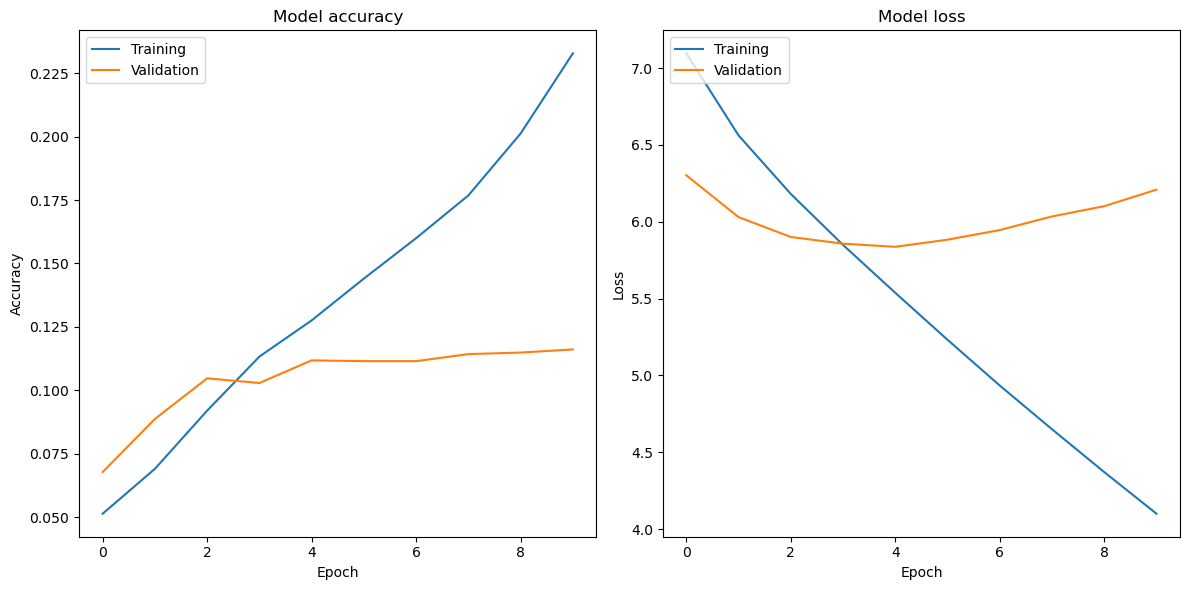

Test accuracy: 12.15%, Test loss: 6.142092704772949


In [23]:
evaluate_model(model, history, test_x, test_y)

In [25]:
seed_text = "The movie was"
review_length = 50  # Generate a review of approximately 50 words
generated_review = generate_review(model, tokenizer, seed_text, max_sequence_len, review_length)
print(generated_review)

The movie was a little school film to be a famous comedy of the protagonist the mythical man in his son for his girlfriend glory gets his father to separate his father to each and his body to separate his father to separate his father to separate his father to separate his father
